# 🧠 Epileptic Seizure Detection using CNN
This notebook builds a CNN model to detect epileptic seizures from EEG time-series data.

In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# 📥 Step 2: Load Dataset (local CSV path for Windows)
file_path = r"C:\\Users\\Shreetech\\Downloads\\Epileptic Seizure Recognition.csv"
df = pd.read_csv(file_path)

# Drop extra columns if present
df.drop(columns=["Unnamed", "Unnamed: 0"], inplace=True, errors='ignore')

# Convert to binary classification (1 = seizure, 0 = non-seizure)
df['y'] = df['y'].apply(lambda x: 1 if x == 1 else 0)

print("Shape:", df.shape)
df.head()

Shape: (11500, 179)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [3]:
# 📊 Step 3: Split Data
X = df.drop("y", axis=1).values
y = df["y"].values

# Normalize
X = X / np.max(X)

# Reshape for CNN (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# 🧠 Step 4: Build CNN Model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Shreetech\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 176, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 88, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 86, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 43, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2752)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         176,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,593 (713.25 KB)

 Trainable params: 182,593 (713.25 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 🏋️ Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8988 - loss: 0.3134 - val_accuracy: 0.9570 - val_loss: 0.0988
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9525 - loss: 0.1213 - val_accuracy: 0.9596 - val_loss: 0.0927
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9546 - loss: 0.1091 - val_accuracy: 0.9609 - val_loss: 0.0891
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9606 - loss: 0.0942 - val_accuracy: 0.9600 - val_loss: 0.0929
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9562 - loss: 0.1039 - val_accuracy: 0.9604 - val_loss: 0.0868
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9627 - loss: 0.0903 - val_accuracy: 0.9591 - val_loss: 0.0845
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9615 - loss: 0.0951 - val_accuracy: 0.9635 - val_loss: 0.0836
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9632 - loss: 0.0867 - val_accurac

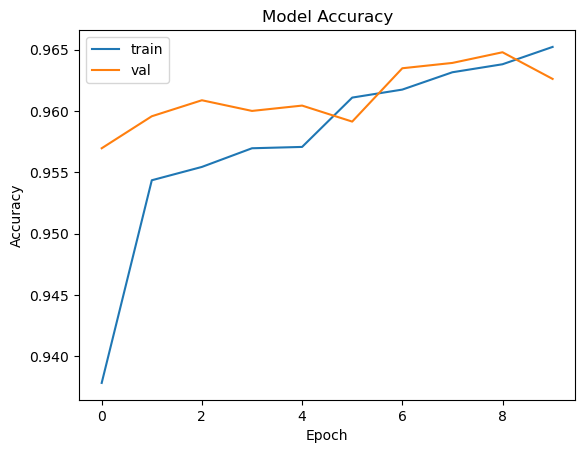

In [6]:
# 📈 Step 6: Plot Accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
# 📊 Step 7: Evaluate Model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[1774   61]
 [  25  440]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1835
           1       0.88      0.95      0.91       465

    accuracy                           0.96      2300
   macro avg       0.93      0.96      0.94      2300
weighted avg       0.96      0.96      0.96      2300



In [8]:
# 💾 Save the trained model
model.save("cnn_seizure_model.h5")
print("✅ Model saved as cnn_seizure_model.h5")


✅ Model saved as cnn_seizure_model.h5
